In [1]:
import numpy as np

class MnistNN:
    def __init__(self, input_size=784, hidden_size=10, output_size=10, alpha=0.01):
        self.alpha = alpha
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))
        self.train_losses = []
        self.val_accuracies = []

    def ReLU(self, x):
        return np.maximum(0, x)

    def ReLU_derivative(self, x):
        return (x > 0).astype(float)

    def softmax(self, x):
        x_shifted = x - np.max(x, axis=0, keepdims=True)
        exp_x = np.exp(x_shifted)
        return exp_x / np.sum(exp_x, axis=0, keepdims=True)

    def forward(self, X):
        out1 = self.W1.dot(X) + self.b1
        out1_activated = self.ReLU(out1)
        out2 = self.W2.dot(out1_activated) + self.b2
        out2_activated = self.softmax(out2)
        return out1, out2, out1_activated, out2_activated

    def one_hot_encode(self, Y):
        num_classes = self.W2.shape[0]
        one_hot = np.zeros((num_classes, Y.size))
        for i in range(Y.size):
            one_hot[Y[i], i] = 1
        return one_hot

    def compute_loss(self, out2_activated, Y):
        onehot = self.one_hot_encode(Y)
        m = Y.size
        log_likelihood = -np.log(out2_activated + 1e-8) * onehot
        loss = np.sum(log_likelihood) / m
        return loss

    def backward(self, out2_activated, out1, X, Y):
        onehot = self.one_hot_encode(Y)
        Dout2 = out2_activated - onehot
        Dout1 = self.W2.T.dot(Dout2) * self.ReLU_derivative(out1)
        dW2 = Dout2.dot(self.ReLU(out1).T) / X.shape[1]
        db2 = np.sum(Dout2) / X.shape[1]
        dW1 = Dout1.dot(X.T) / X.shape[1]
        db1 = np.sum(Dout1) / X.shape[1]
        return dW1, db1, dW2, db2

    def update(self, dW1, db1, dW2, db2):
        self.W1 -= self.alpha * dW1
        self.b1 -= self.alpha * db1
        self.W2 -= self.alpha * dW2
        self.b2 -= self.alpha * db2

    def gradient_descent(self, X, Y):
        out1, out2, out1_activated, out2_activated = self.forward(X)
        dW1, db1, dW2, db2 = self.backward(out2_activated, out1, X, Y)
        self.update(dW1, db1, dW2, db2)

    def train(self, X, Y, iterations, X_val=None, Y_val=None):
        for i in range(iterations):
            self.gradient_descent(X, Y)
            _, _, _, out2_activated = self.forward(X)
            loss = self.compute_loss(out2_activated, Y)
            self.train_losses.append(loss)
            
            val_accuracy = self.evaluate(X_val, Y_val, verbose=False)
            self.val_accuracies.append(val_accuracy)
            if (i + 1) % 100 == 0:
                print(f"Iteration {i+1}/{iterations}, Loss: {loss:.4f}, Val Accuracy: {val_accuracy*100:.2f}%")

    def evaluate(self, X, Y, verbose=True):
        _, _, _, out2_activated = self.forward(X)
        predictions = np.argmax(out2_activated, axis=0)
        accuracy = np.mean(predictions == Y)
        if verbose:
            print(accuracy * 100)
        return accuracy



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')
data_train = data.sample(frac=0.8, random_state=42)
data_test = data.drop(data_train.index)

X_train = data_train.iloc[:, 1:].values.T / 255.0
Y_train = data_train.iloc[:, 0].values

X_test = data_test.iloc[:, 1:].values.T / 255.0
Y_test = data_test.iloc[:, 0].values

# Split test into validation and test
# Transpose X_test to (samples, features) for splitting
X_test_T = X_test.T
X_test_split, X_val_split, Y_test_split, Y_val_split = train_test_split(X_test_T, Y_test, test_size=0.5, random_state=42)
# Transpose back to (features, samples)
X_test = X_test_split.T
X_val = X_val_split.T
Y_test = Y_test_split
Y_val = Y_val_split


neuralnet = MnistNN(input_size=784, hidden_size=10, output_size=10, alpha=0.01)
neuralnet.train(X_train, Y_train, iterations=2000, X_val=X_val, Y_val=Y_val)


neuralnet.evaluate(X_test, Y_test)

Iteration 100/2000, Loss: 2.3017, Val Accuracy: 23.19%
Iteration 200/2000, Loss: 2.2998, Val Accuracy: 25.52%
Iteration 300/2000, Loss: 2.2949, Val Accuracy: 25.71%
Iteration 400/2000, Loss: 2.2832, Val Accuracy: 23.60%
Iteration 500/2000, Loss: 2.2555, Val Accuracy: 22.38%
Iteration 600/2000, Loss: 2.1988, Val Accuracy: 22.12%
Iteration 700/2000, Loss: 2.1100, Val Accuracy: 23.90%
Iteration 800/2000, Loss: 2.0003, Val Accuracy: 28.67%
Iteration 900/2000, Loss: 1.8786, Val Accuracy: 32.74%
Iteration 1000/2000, Loss: 1.7388, Val Accuracy: 37.24%
Iteration 1100/2000, Loss: 1.5624, Val Accuracy: 50.33%
Iteration 1200/2000, Loss: 1.3700, Val Accuracy: 62.95%
Iteration 1300/2000, Loss: 1.2108, Val Accuracy: 67.74%
Iteration 1400/2000, Loss: 1.0894, Val Accuracy: 70.62%
Iteration 1500/2000, Loss: 0.9935, Val Accuracy: 73.00%
Iteration 1600/2000, Loss: 0.9146, Val Accuracy: 74.45%
Iteration 1700/2000, Loss: 0.8484, Val Accuracy: 76.17%
Iteration 1800/2000, Loss: 0.7928, Val Accuracy: 77.62%
I

np.float64(0.8047619047619048)

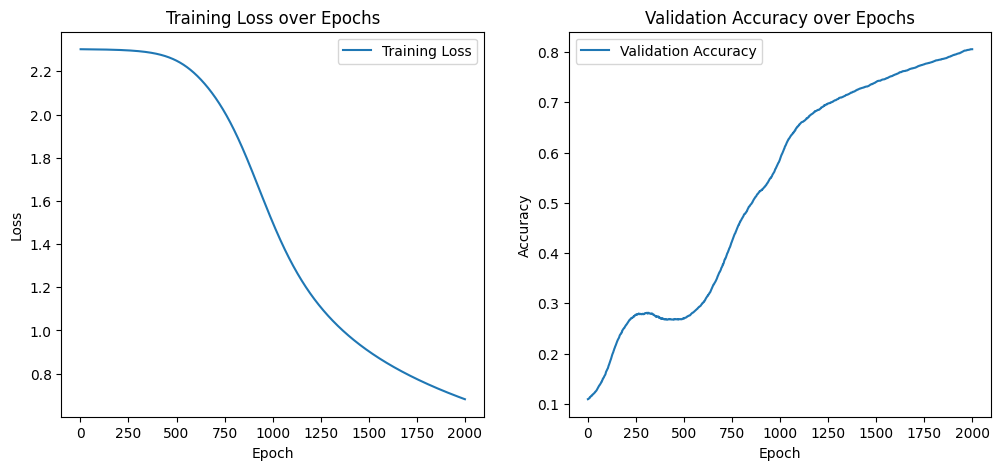

In [12]:
# Plot training loss and validation accuracy
import matplotlib.pyplot as plt

epochs = range(1, len(neuralnet.train_losses) + 1)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs, neuralnet.train_losses, label='Training Loss')
#scale y-axis logarithmically
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, neuralnet.val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.show()
